In [1]:
import cv2

import matplotlib.pyplot as plt

In [2]:
def show_image(image, name='Lenna'):
    plt.imshow(image)
    plt.title(name)
    plt.show()

In [3]:
def equalize_histogram(image, channels):
    _image = image.copy()
    for channel in channels:
        _image[: , : , channel] = cv2.equalizeHist(_image[: , : , channel])
    return _image

In [4]:
def plot_equalized_histograms(image, color_space, color_space_name, channels):
    image_in_color_space = cv2.cvtColor(image, color_space)
    equalized_image_in_color_space = equalize_histogram(image_in_color_space, channels)
    title = f'Histogram equalization for {color_space_name}'

    _, axs = plt.subplots(1, 2)
    plt.title(title)
    axs[0].set(title='Before')
    axs[0].imshow(image_in_color_space)
    axs[1].set(title='After')
    axs[1].imshow(equalized_image_in_color_space)
    plt.savefig(title)
    plt.show()

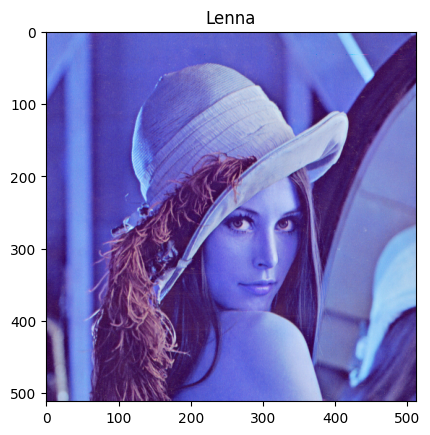

(512, 512, 3)


In [5]:
image = cv2.imread('../images/Lenna.png')
show_image(image)
print(image.shape)

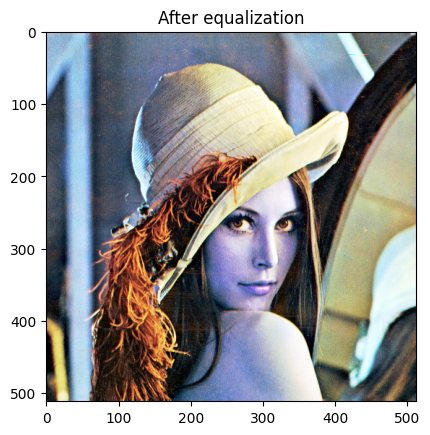

In [6]:
equalized_image = equalize_histogram(image, [0, 1, 2])
show_image(equalized_image, 'After equalization')

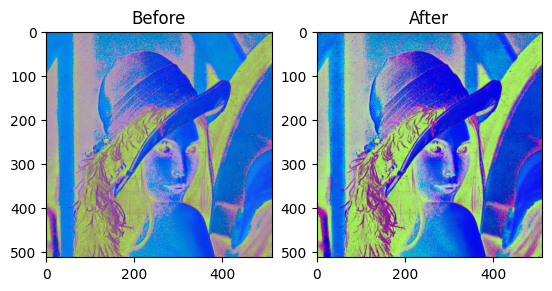

In [7]:
plot_equalized_histograms(image, cv2.COLOR_BGR2HSV, 'HSV', [1])

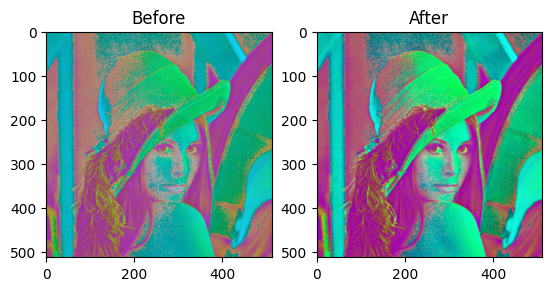

In [8]:
plot_equalized_histograms(image, cv2.COLOR_BGR2HLS, 'HSL', [1])

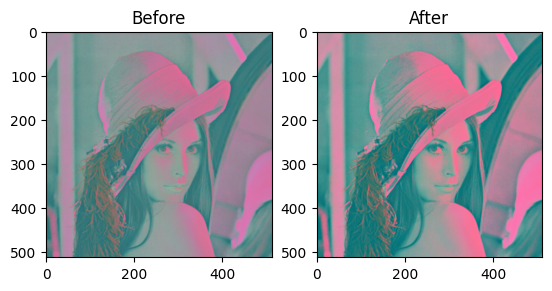

In [9]:
plot_equalized_histograms(image, cv2.COLOR_BGR2LUV, 'LUV', [0])

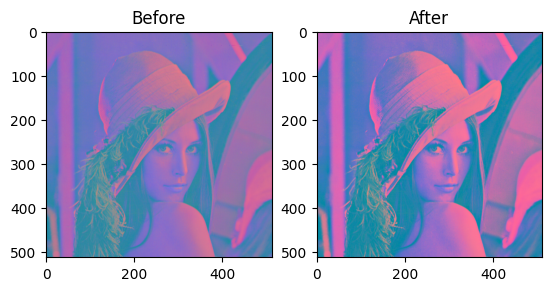

In [10]:
plot_equalized_histograms(image, cv2.COLOR_BGR2YUV, 'YUV', [0])

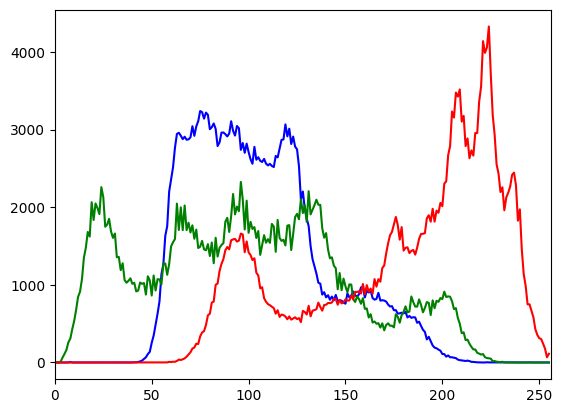

<Figure size 640x480 with 0 Axes>

In [11]:
colors = ('b','g','r')
for i, color in enumerate(colors):
    image_histogram = cv2.calcHist([image], [i], None, [256], [0,256])
    plt.plot(image_histogram, color=color)
    plt.xlim([0,256])
plt.show()
plt.savefig('Color histogram.png')